In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopandas
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

import html5lib
!pip install lxml

     |████████████████████████████████| 931kB 12.6MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 28.5MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 6.7MB/s eta 0:00:011    |█▉                              | 819kB 24.9MB/s eta 0:00:01     |████████████████████████▏       | 11.1MB 6.7MB/s eta 0:00:01     |██████████████████████████▍     | 12.1MB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 4.8MB/s eta 0:00:01
     |████████████████████████████████| 92kB 20.3MB/s eta 0:00:01
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6
     |████████████████████████████████| 122kB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 5.6MB/s eta 0:00:01


In [2]:
#@hidden_cell

#utilizing the Foursquare API to explore the neighborhoods
CLIENT_ID = 'LQJYP3PBDUH1AV3WX2VIHGVTVF5CBNEJLFYSOJVBB2L3KQXE' # your Foursquare ID
CLIENT_SECRET = 'VYYJ5N42P5SKVLWLUSTACZN5P3UNEAMEGIL1RMBZZF0KJDW1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print(pd.__version__)

Your credentails:
CLIENT_ID: LQJYP3PBDUH1AV3WX2VIHGVTVF5CBNEJLFYSOJVBB2L3KQXE
CLIENT_SECRET:VYYJ5N42P5SKVLWLUSTACZN5P3UNEAMEGIL1RMBZZF0KJDW1
1.0.3


### Toronto

In [3]:
#Toronto data
wiki_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
dflist = pd.read_html(wiki_url)[0]
#Pre-processing
#drop rows with Borough='Not assigned'
df=dflist.drop(dflist.index[dflist.Borough=='Not assigned'])
df.sort_values(by=['Postal Code'], inplace=True)
df.reset_index(drop=True, inplace=True)
!wget -q -O 'toronto_data.csv' http://cocl.us/Geospatial_data
geodf=pd.read_csv('toronto_data.csv')
df.set_index('Postal Code', inplace=True)
geodf.set_index('Postal Code',  inplace=True)
toronto_df=df.merge(geodf, left_index=True, right_index=True)
toronto_df.reset_index(inplace=True)

torontocity_data = toronto_df[toronto_df['Borough'].str.contains('Toronto')].reset_index(drop=True)
df_toronto1 = torontocity_data.drop(['Postal Code'], axis=1)
print(df_toronto1.shape)
df_toronto1.head()

(39, 4)


,Borough,Neighborhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


In [4]:
# Reshape the dataframe: one line for each neighborhood
df_toronto=df_toronto1.set_index(['Borough','Latitude','Longitude']).stack().str.split(',', expand=True).stack()
df_toronto=df_toronto.unstack(-2).reset_index(-1,drop=True).reset_index()
df_toronto = df_toronto.reindex(columns=['Borough','Neighborhood','Latitude', 'Longitude'])
print(df_toronto.shape)
df_toronto.head(78)

(78, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Central Toronto,The Annex,43.672710,-79.405678
1,Central Toronto,North Midtown,43.672710,-79.405678
2,Central Toronto,Yorkville,43.672710,-79.405678
3,Central Toronto,Summerhill West,43.686412,-79.400049
4,Central Toronto,Rathnelly,43.686412,-79.400049
5,Central Toronto,South Hill,43.686412,-79.400049
6,Central Toronto,Forest Hill SE,43.686412,-79.400049
7,Central Toronto,Deer Park,43.686412,-79.400049
8,Central Toronto,Moore Park,43.689574,-79.383160
9,Central Toronto,Summerhill East,43.689574,-79.383160


In [5]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [6]:
#Function to have all the venue from the different neighborhoods
LIMIT=500
radius=500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

The Annex
 North Midtown
 Yorkville
Summerhill West
 Rathnelly
 South Hill
 Forest Hill SE
 Deer Park
Moore Park
 Summerhill East
Forest Hill North & West
 Forest Hill Road Park
Davisville
Roselawn
Davisville North
North Toronto West
 Lawrence Park
Lawrence Park
CN Tower
 King and Spadina
 Railway Lands
 Harbourfront West
 Bathurst Quay
 South Niagara
 Island airport
Harbourfront East
 Union Station
 Toronto Islands
Berczy Park
Stn A PO Boxes
Toronto Dominion Centre
 Design Exchange
Commerce Court
 Victoria Hotel
First Canadian Place
 Underground city
Richmond
 Adelaide
 King
St. James Town
Kensington Market
 Chinatown
 Grange Park
Regent Park
 Harbourfront
Garden District
 Ryerson
Central Bay Street
Queen's Park
 Ontario Provincial Government
University of Toronto
 Harbord
Church and Wellesley
St. James Town
 Cabbagetown
Christie
Rosedale
Studio District
Business reply mail Processing Centre
 South Central Letter Processing Plant Toronto
India Bazaar
 The Beaches West
The Beaches
The 

In [8]:
print(toronto_venues.shape)
toronto_venues.head()

(3172, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Annex,43.67271,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant
1,The Annex,43.67271,-79.405678,Ezra's Pound,43.675153,-79.405858,Café
2,The Annex,43.67271,-79.405678,Jean Sibelius Square,43.671426,-79.408831,Park
3,The Annex,43.67271,-79.405678,Krispy Kreme Doughnut Cafe,43.674732,-79.407730,Donut Shop
4,The Annex,43.67271,-79.405678,Live Organic Food Bar,43.675053,-79.406715,Vegetarian / Vegan Restaurant


### New York

In [15]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

with open('newyork_data.json') as json_data:
        newyork_data = json.load(json_data)

In [16]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


df_ny=neighborhoods
print(df_ny.shape)
df_ny.head()

(306, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [17]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_ny['Latitude'], df_ny['Longitude'], df_ny['Borough'], df_ny['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [21]:
ny_venues = getNearbyVenues(names=df_ny['Neighborhood'],
                                   latitudes=df_ny['Latitude'],
                                   longitudes=df_ny['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [22]:
print(ny_venues.shape)
ny_venues.head()

(10007, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


### Zurich

In [23]:
wiki_z='https://en.wikipedia.org/wiki/Subdivisions_of_Z%C3%BCrich'
df = pd.read_html(wiki_z)[1]
df=pd.DataFrame(df)
df= df[df.District.str.get(0).isin(['D'])]
df.drop(['Location', 'Coat of Arms', 'BFS-Code', 'Incorporation', 'Areain km²','Population2005','Non-Swiss Citizens'],axis=1,inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)

,District,Neighborhood
0,District 1Altstadt,Rathaus Hochschulen Lindenhof City
1,District 2,Wollishofen Leimbach Enge
2,District 3Wiedikon,Alt-Wiedikon Friesenberg Sihlfeld
3,District 4Aussersihl,Werd Langstrasse Hard
4,District 5Industriequartier,Gewerbeschule Escher Wyss
5,District 6,Unterstrass Oberstrass
6,District 7,Fluntern Hottingen Hirslanden Witikon
7,District 8Riesbach,Seefeld Mühlebach Weinegg
8,District 9,Albisrieden Altstetten
9,District 10,Höngg Wipkingen


In [24]:
#rename District name
town=['Zurich','Zurich','Zurich','Zurich','Zurich','Zurich','Zurich','Zurich','Zurich','Zurich','Zurich','Zurich']
df['Town']=town
borough=['Altstadt', 'Enge & Wollishofen', 'Wiedikon', 'Aussersihl', 'Industriequartier', 'Unterstrass', 'Zurich Hill', 'Riesbach', 'Albisrieden', 'Höngg', 'Zürich Nord','Schwamendingen']
df['Borough']=borough
df.drop(['District'],axis=1,inplace=True)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]

df=df[cols]
df.head(12)

,Borough,Neighborhood,Town
0,Altstadt,Rathaus Hochschulen Lindenhof City,Zurich
1,Enge & Wollishofen,Wollishofen Leimbach Enge,Zurich
2,Wiedikon,Alt-Wiedikon Friesenberg Sihlfeld,Zurich
3,Aussersihl,Werd Langstrasse Hard,Zurich
4,Industriequartier,Gewerbeschule Escher Wyss,Zurich
5,Unterstrass,Unterstrass Oberstrass,Zurich
6,Zurich Hill,Fluntern Hottingen Hirslanden Witikon,Zurich
7,Riesbach,Seefeld Mühlebach Weinegg,Zurich
8,Albisrieden,Albisrieden Altstetten,Zurich
9,Höngg,Höngg Wipkingen,Zurich


In [25]:
from geopy.extra.rate_limiter import RateLimiter

locator=Nominatim(user_agent='myGeocoder')
df['Adress']=df['Borough']+ ', '+ df['Town']
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['Adress'].apply(geocode)
# 3 - create longitude, latitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['Latitude', 'Longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df = df.drop(['Town', 'Adress', 'location','altitude', 'point'], axis=1)
df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Altstadt,Rathaus Hochschulen Lindenhof City,47.372233,8.542329
1,Enge & Wollishofen,Wollishofen Leimbach Enge,47.351598,8.526223
2,Wiedikon,Alt-Wiedikon Friesenberg Sihlfeld,47.366267,8.510713
3,Aussersihl,Werd Langstrasse Hard,47.378714,8.521200
4,Industriequartier,Gewerbeschule Escher Wyss,47.387507,8.520627


In [26]:

df=pd.DataFrame(df)
df_zurich=df.set_index(['Borough','Latitude','Longitude']).stack().str.split(' ', expand=True).stack()
df_zurich=df_zurich.unstack(-2).reset_index(-1,drop=True).reset_index()
df_zurich= df_zurich.reindex(columns=['Borough','Neighborhood','Latitude', 'Longitude'])
print(df_zurich.shape)
df_zurich.head()


(36, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Albisrieden,Albisrieden,47.374857,8.484657
1,Albisrieden,Altstetten,47.374857,8.484657
2,Altstadt,Rathaus,47.372233,8.542329
3,Altstadt,Hochschulen,47.372233,8.542329
4,Altstadt,Lindenhof,47.372233,8.542329


In [27]:
address = 'Zurich,CH'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# create map of New York using latitude and longitude values
map_zurich = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_zurich['Latitude'], df_zurich['Longitude'], df_zurich['Borough'], df_zurich['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zurich)  
    
map_zurich

In [28]:
zurich_venues = getNearbyVenues(names=df_zurich['Neighborhood'],
                                   latitudes=df_zurich['Latitude'],
                                   longitudes=df_zurich['Longitude']
                                  )

Albisrieden
Altstetten
Rathaus
Hochschulen
Lindenhof
City
Werd
Langstrasse
Hard
Wollishofen
Leimbach
Enge
Höngg
Wipkingen
Gewerbeschule
Escher
Wyss
Seefeld
Mühlebach
Weinegg
Saatlen
Schwamendingen
Mitte
Hirzenbach
Unterstrass
Oberstrass
Alt-Wiedikon
Friesenberg
Sihlfeld
Fluntern
Hottingen
Hirslanden
Witikon
Affoltern
Oerlikon
Seebach


In [29]:
print(zurich_venues.shape)
zurich_venues.head()

(1463, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albisrieden,47.374857,8.484657,Coop,47.375718,8.487185,Supermarket
1,Albisrieden,47.374857,8.484657,Sternen Albisrieden,47.375289,8.485041,Swiss Restaurant
2,Albisrieden,47.374857,8.484657,Migros,47.374872,8.485780,Grocery Store
3,Albisrieden,47.374857,8.484657,Emilia Trattoria Pizzeria,47.375923,8.488154,Trattoria/Osteria
4,Albisrieden,47.374857,8.484657,Gasthof zum weissen Rössli,47.375097,8.484392,Restaurant


In [30]:
to_venues=toronto_venues
zh_venues=zurich_venues

In [31]:
#number of venues per Neighborhood
ny_neigh = ny_venues[['Neighborhood','Venue']].groupby('Neighborhood').count()
to_neigh = to_venues[['Neighborhood','Venue']].groupby('Neighborhood').count()
zh_neigh = zh_venues[['Neighborhood','Venue']].groupby('Neighborhood').count()

ny_moy = ny_neigh[['Venue']].sum() / df_ny[['Neighborhood'][0]].count()
to_moy = to_neigh[['Venue']].sum() / df_toronto[['Neighborhood'][0]].count()
zh_moy = zh_neigh[['Venue']].sum() / df_zurich[['Neighborhood'][0]].count()

print('Venue per Neighborhood in NY:', ny_moy[0])
print('Venue per Neighborhood in TO:', to_moy[0])
print('Venue per Neighborhood in ZH:', zh_moy[0])

Venue per Neighborhood in NY: 32.70261437908497
Venue per Neighborhood in TO: 40.666666666666664
Venue per Neighborhood in ZH: 40.638888888888886


In [32]:

print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))
print('There are {} uniques categories.'.format(len(to_venues['Venue Category'].unique())))
print('There are {} uniques categories.'.format(len(zh_venues['Venue Category'].unique())))

There are 433 uniques categories.
There are 236 uniques categories.
There are 118 uniques categories.


In [33]:
regex = '.*(Neighborhood|Restaurant|tratoria|backery|bagel|food|diner|breakfast|bistro|burrito|butcher|pizz|brewery|creperie|fish|place|pub|steak|gastro).*'

In [34]:
#NY
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")
ny_onehot = ny_onehot.filter(regex= regex, axis=1)

In [35]:
ny_sum=ny_onehot.sum(axis=0)
ny_sum=pd.DataFrame(ny_sum, columns=['Total'])
ny_sum=ny_sum.sort_values(by='Total',ascending=False)
ny_sum15=ny_sum.head(15)
ny_sum.head()

,Total
Italian Restaurant,298
Chinese Restaurant,206
Mexican Restaurant,175
American Restaurant,160
Sushi Restaurant,111


In [36]:
# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 
ny_grouped = ny_onehot.groupby('Neighborhood').sum().reset_index()
ny_grouped = ny_grouped.append(ny_grouped.drop('Neighborhood', axis=1).sum().rename('Total'))
ny_grouped.at['Total', 'Neighborhood'] = 'Total'
ny_grouped = ny_grouped.reset_index(drop=True)
ny_grouped ['Total'] = ny_grouped.sum(axis=1)
ny_grouped.tail(5)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total
296,Woodlawn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
297,Woodrow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
298,Woodside,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,26.0
299,Yorkville,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,29.0
300,Total,3.0,5.0,160.0,9.0,10.0,39.0,3.0,2.0,5.0,8.0,1.0,3.0,79.0,3.0,206.0,3.0,4.0,20.0,1.0,8.0,10.0,12.0,3.0,5.0,1.0,4.0,15.0,92.0,10.0,58.0,17.0,6.0,1.0,39.0,4.0,5.0,3.0,8.0,59.0,1.0,3.0,298.0,2.0,92.0,2.0,3.0,64.0,3.0,81.0,3.0,4.0,49.0,175.0,35.0,2.0,1.0,2.0,40.0,1.0,3.0,2.0,2.0,23.0,5.0,23.0,78.0,2.0,6.0,1.0,77.0,2.0,8.0,1.0,22.0,2.0,16.0,63.0,1.0,111.0,1.0,3.0,4.0,12.0,1.0,86.0,2.0,17.0,1.0,37.0,37.0,2434.0


In [37]:
#TO
# one hot encoding
to_onehot = pd.get_dummies(to_venues[['Venue Category']], prefix="", prefix_sep="")
to_onehot = to_onehot.filter(regex= regex, axis=1)

In [38]:
to_sum=to_onehot.sum(axis=0)
to_sum=pd.DataFrame(to_sum, columns=['Total'])
to_sum=to_sum.sort_values(by='Total',ascending=False)
to_sum15=to_sum.head(15)
to_sum15.head()

,Total
Restaurant,105
Italian Restaurant,75
Japanese Restaurant,58
Sushi Restaurant,48
American Restaurant,40


In [39]:
# add neighborhood column back to dataframe
to_onehot['Neighborhood'] = to_venues['Neighborhood'] 
to_grouped = to_onehot.groupby('Neighborhood').sum().reset_index()
to_grouped = to_grouped.append(to_grouped.drop('Neighborhood', axis=1).sum().rename('Total'))
to_grouped.at['Total', 'Neighborhood'] = 'Total'
to_grouped = to_grouped.reset_index(drop=True)
to_grouped ['Total'] = to_grouped.sum(axis=1)
to_grouped.tail(5)

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total
73,The Beaches,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,The Danforth West,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
75,Toronto Dominion Centre,0.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0
76,University of Toronto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
77,Total,1.0,40.0,24.0,4.0,5.0,2.0,8.0,14.0,5.0,9.0,4.0,3.0,3.0,4.0,3.0,3.0,24.0,3.0,16.0,27.0,1.0,9.0,24.0,13.0,75.0,58.0,3.0,8.0,2.0,7.0,20.0,15.0,6.0,1.0,2.0,17.0,2.0,6.0,105.0,35.0,48.0,2.0,2.0,31.0,1.0,36.0,18.0,749.0


In [40]:
#ZH
# one hot encoding
zh_onehot = pd.get_dummies(zh_venues[['Venue Category']], prefix="", prefix_sep="")
zh_onehot = zh_onehot.filter(regex= regex, axis=1)
zh_onehot.head()

,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Cambodian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gastropub,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Peruvian Restaurant,Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [41]:

zh_sum=zh_onehot.sum(axis=0)
zh_sum=pd.DataFrame(zh_sum, columns=['Total'])
zh_sum=zh_sum.sort_values(by='Total',ascending=False)
zh_sum15=zh_sum.head(15)
zh_sum15.head()

,Total
Swiss Restaurant,98
Italian Restaurant,65
Restaurant,62
Thai Restaurant,27
Vegetarian / Vegan Restaurant,22


In [42]:
# add neighborhood column back zh dataframe
zh_onehot['Neighborhood'] = zh_venues['Neighborhood'] 
zh_grouped = zh_onehot.groupby('Neighborhood').sum().reset_index()
zh_grouped = zh_grouped.append(zh_grouped.drop('Neighborhood', axis=1).sum().rename('Total'))
zh_grouped.at['Total', 'Neighborhood'] = 'Total'
zh_grouped = zh_grouped.reset_index(drop=True)
zh_grouped = zh_grouped.filter(regex= regex, axis=1)
zh_grouped ['Total'] = zh_grouped.sum(axis=1)
zh_grouped.tail()

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Cambodian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gastropub,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Peruvian Restaurant,Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Total
32,Wipkingen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
33,Witikon,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,7.0,1.0,0.0,2.0,0.0,22.0
34,Wollishofen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
35,Wyss,0.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,26.0
36,Total,6.0,8.0,16.0,3.0,3.0,3.0,3.0,8.0,5.0,16.0,3.0,5.0,65.0,17.0,3.0,3.0,14.0,11.0,10.0,3.0,3.0,62.0,3.0,11.0,7.0,98.0,27.0,3.0,22.0,3.0,444.0


In [48]:
#Density of Food Place per Neighborhood
ny_food = ny_grouped['Total'].iloc[-1]
to_food = to_grouped['Total'].iloc[-1]
zh_food = zh_grouped['Total'].iloc[-1]

ny_moy_food = ny_food / df_ny[['Neighborhood'][0]].count()
to_moy_food = to_food / df_toronto[['Neighborhood'][0]].count()
zh_moy_food = zh_food / df_zurich[['Neighborhood'][0]].count()

In [49]:
# function to sort the food place in descending order.
num_top_venues = 10
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
# NY top food place
ny_grouped2 = ny_grouped.drop(['Total'], axis=1)

for hood in ny_grouped2['Neighborhood']:
    temp = ny_grouped2[ny_grouped2['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ny_food_sorted = pd.DataFrame(columns=columns)
ny_food_sorted['Neighborhood'] = ny_grouped2['Neighborhood']

for ind in np.arange(ny_grouped2.shape[0]):
    ny_food_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped2.iloc[ind, :], num_top_venues)

ny_food_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Chinese Restaurant,Spanish Restaurant,American Restaurant,Fast Food Restaurant,Mexican Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant
1,Annadale,Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gastropub
2,Arden Heights,Vietnamese Restaurant,Egyptian Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gastropub,German Restaurant
3,Arlington,American Restaurant,Vietnamese Restaurant,Greek Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gastropub
4,Arrochar,Italian Restaurant,Polish Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,German Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [51]:
#ny top 10 per Neighborhood
ny_food_sorted_neig = ny_food_sorted.drop(ny_food_sorted.tail(1).index)
ny_food_sorted_neig.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
295,Woodhaven,Arepa Restaurant,Thai Restaurant,Latin American Restaurant,Restaurant,Vietnamese Restaurant,German Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant
296,Woodlawn,American Restaurant,Italian Restaurant,Indian Restaurant,Vietnamese Restaurant,Gluten-free Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
297,Woodrow,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,German Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant
298,Woodside,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,American Restaurant,Japanese Restaurant,Fast Food Restaurant,Gastropub,Halal Restaurant,Himalayan Restaurant,Chinese Restaurant
299,Yorkville,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant,Peruvian Restaurant,German Restaurant,Asian Restaurant,Indian Restaurant


In [52]:
#ny top 10
ny = ny_food_sorted.iloc[[-1]]
ny = ny.reset_index(drop=True)
ny.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Total,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,American Restaurant,Sushi Restaurant,Fast Food Restaurant,Japanese Restaurant,Thai Restaurant,Latin American Restaurant,Caribbean Restaurant


In [53]:
# to top food place
num_top_venues = 10
to_grouped2 = to_grouped.drop(['Total'], axis=1)

for hood in to_grouped2['Neighborhood']:
    temp = to_grouped2[to_grouped2['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
to_food_sorted = pd.DataFrame(columns=columns)
to_food_sorted['Neighborhood'] = to_grouped2['Neighborhood']

for ind in np.arange(to_grouped2.shape[0]):
    to_food_sorted.iloc[ind, 1:] = return_most_common_venues(to_grouped2.iloc[ind, :], num_top_venues)

to_food_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Adelaide,Restaurant,Thai Restaurant,American Restaurant,Sushi Restaurant,Modern European Restaurant,New American Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Colombian Restaurant,Fast Food Restaurant,Gluten-free Restaurant,Latin American Restaurant,Japanese Restaurant,Brazilian Restaurant,Seafood Restaurant
1,Bathurst Quay,Vietnamese Restaurant,Doner Restaurant,German Restaurant,Gastropub,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Cuban Restaurant,Greek Restaurant,Comfort Food Restaurant,Colombian Restaurant
2,Cabbagetown,Restaurant,Italian Restaurant,Indian Restaurant,Japanese Restaurant,Chinese Restaurant,Caribbean Restaurant,Gastropub,Taiwanese Restaurant,Thai Restaurant,Brazilian Restaurant,Eastern European Restaurant,French Restaurant,Filipino Restaurant,American Restaurant,Fast Food Restaurant
3,Chinatown,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Comfort Food Restaurant,Japanese Restaurant,Filipino Restaurant,Dumpling Restaurant,Doner Restaurant,Caribbean Restaurant,Belgian Restaurant,Chinese Restaurant,Falafel Restaurant,American Restaurant,Gastropub,Asian Restaurant
4,Deer Park,Vietnamese Restaurant,American Restaurant,Sushi Restaurant,Restaurant,Doner Restaurant,Gastropub,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Comfort Food Restaurant,Cuban Restaurant


In [54]:
#to top 10 per Neighborhood
to_food_sorted_neig = to_food_sorted.drop(to_food_sorted.tail(1).index)
to_food_sorted_neig.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
72,The Annex,Indian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Eastern European Restaurant,German Restaurant,Gastropub,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,American Restaurant,Dumpling Restaurant,Belgian Restaurant
73,The Beaches,Vietnamese Restaurant,Doner Restaurant,German Restaurant,Gastropub,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Cuban Restaurant,Greek Restaurant,Comfort Food Restaurant,Colombian Restaurant
74,The Danforth West,Greek Restaurant,Italian Restaurant,Restaurant,Caribbean Restaurant,Japanese Restaurant,Indian Restaurant,American Restaurant,Cajun / Creole Restaurant,Ethiopian Restaurant,Gastropub,Asian Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
75,Toronto Dominion Centre,Restaurant,American Restaurant,Japanese Restaurant,Italian Restaurant,Seafood Restaurant,Asian Restaurant,Sushi Restaurant,French Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Gluten-free Restaurant,Greek Restaurant,Fast Food Restaurant,Gastropub
76,University of Toronto,Italian Restaurant,Japanese Restaurant,Restaurant,Comfort Food Restaurant,French Restaurant,Sushi Restaurant,Chinese Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Vietnamese Restaurant


In [55]:
#to top 10
to = to_food_sorted.iloc[[-1]]
to = to.reset_index(drop=True)
to.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Total,Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Thai Restaurant,Gastropub,Greek Restaurant,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,New American Restaurant


In [56]:
# zh top food place
num_top_venues = 10
zh_grouped2 = zh_grouped.drop(['Total'], axis=1)


for hood in zh_grouped2['Neighborhood']:
    temp = zh_grouped2[zh_grouped2['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

    
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zh_food_sorted = pd.DataFrame(columns=columns)
zh_food_sorted['Neighborhood'] = zh_grouped2['Neighborhood']

for ind in np.arange(zh_grouped2.shape[0]):
    zh_food_sorted.iloc[ind, 1:] = return_most_common_venues(zh_grouped2.iloc[ind, :], num_top_venues)

zh_food_sorted.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
32,Wipkingen,Fast Food Restaurant,Mexican Restaurant,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Cambodian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,French Restaurant,Gastropub,Indian Restaurant
33,Witikon,Swiss Restaurant,Restaurant,Italian Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Argentinian Restaurant,Thai Restaurant,Sushi Restaurant,Spanish Restaurant,Japanese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Austrian Restaurant,Eastern European Restaurant
34,Wollishofen,American Restaurant,Restaurant,Japanese Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Cambodian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gastropub,Indian Restaurant,Italian Restaurant
35,Wyss,Restaurant,Italian Restaurant,Falafel Restaurant,Mexican Restaurant,Swiss Restaurant,Asian Restaurant,Gastropub,Eastern European Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Modern European Restaurant,Cambodian Restaurant,Fast Food Restaurant,Southern / Soul Food Restaurant
36,Total,Swiss Restaurant,Italian Restaurant,Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,French Restaurant,Mediterranean Restaurant,Spanish Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Argentinian Restaurant,Falafel Restaurant,Sushi Restaurant


In [57]:
#ZH top 10 per Neighborhood
zh_food_sorted_neig = zh_food_sorted.drop(zh_food_sorted.tail(1).index)
zh_food_sorted_neig.tail()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
31,Werd,Italian Restaurant,Swiss Restaurant,Thai Restaurant,Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Mediterranean Restaurant,Asian Restaurant,Chinese Restaurant,Indian Restaurant,American Restaurant,Peruvian Restaurant,Tibetan Restaurant
32,Wipkingen,Fast Food Restaurant,Mexican Restaurant,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Cambodian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,French Restaurant,Gastropub,Indian Restaurant
33,Witikon,Swiss Restaurant,Restaurant,Italian Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Argentinian Restaurant,Thai Restaurant,Sushi Restaurant,Spanish Restaurant,Japanese Restaurant,Vietnamese Restaurant,Falafel Restaurant,Austrian Restaurant,Eastern European Restaurant
34,Wollishofen,American Restaurant,Restaurant,Japanese Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Cambodian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gastropub,Indian Restaurant,Italian Restaurant
35,Wyss,Restaurant,Italian Restaurant,Falafel Restaurant,Mexican Restaurant,Swiss Restaurant,Asian Restaurant,Gastropub,Eastern European Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Modern European Restaurant,Cambodian Restaurant,Fast Food Restaurant,Southern / Soul Food Restaurant


In [58]:

#zh top 10
zh = zh_food_sorted.iloc[[-1]]
zh = zh.reset_index(drop=True)
zh.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Total,Swiss Restaurant,Italian Restaurant,Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,French Restaurant,Mediterranean Restaurant,Spanish Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Argentinian Restaurant,Falafel Restaurant,Sushi Restaurant


In [59]:
#append
all = ny.append(to)
all = all.append(zh)
all = all.drop(['Neighborhood'], axis=1)
all = all.reset_index(drop=True)
all.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,American Restaurant,Sushi Restaurant,Fast Food Restaurant,Japanese Restaurant,Thai Restaurant,Latin American Restaurant,Caribbean Restaurant,NaN,NaN,NaN,NaN,NaN
1,Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Thai Restaurant,Gastropub,Greek Restaurant,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,New American Restaurant
2,Swiss Restaurant,Italian Restaurant,Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,French Restaurant,Mediterranean Restaurant,Spanish Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Argentinian Restaurant,Falafel Restaurant,Sushi Restaurant


In [60]:
#Comparison Table

data = {'City': ['NY',  'Toronto',  'Zurich'],
        'N. of Neighborhood': [df_ny[['Neighborhood'][0]].count(), df_toronto[['Neighborhood'][0]].count(),df_zurich[['Neighborhood'][0]].count()],
        'Density of Venue': [round(ny_moy[0]),round(to_moy[0]),round(zh_moy[0])],
        'Density of Food Place':[round(ny_moy_food),round(to_moy_food),round(zh_moy_food)],
        'Variety of Food Place':[len(ny_grouped.columns) - 2,len(to_grouped.columns) - 2,len(zh_grouped.columns) - 2]
       }
df_nb_neigh = pd.DataFrame(data,columns=['City','N. of Neighborhood','Density of Venue','Density of Food Place','Variety of Food Place'])
df_nb_neigh = pd.concat([df_nb_neigh, all],axis =1)
df_nb_neigh.head()

,City,N. of Neighborhood,Density of Venue,Density of Food Place,Variety of Food Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,NY,306,33.0,8.0,90,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,American Restaurant,Sushi Restaurant,Fast Food Restaurant,Japanese Restaurant,Thai Restaurant,Latin American Restaurant,Caribbean Restaurant,NaN,NaN,NaN,NaN,NaN
1,Toronto,78,41.0,10.0,47,Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Thai Restaurant,Gastropub,Greek Restaurant,Fast Food Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,New American Restaurant
2,Zurich,36,41.0,12.0,30,Swiss Restaurant,Italian Restaurant,Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Asian Restaurant,French Restaurant,Mediterranean Restaurant,Spanish Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Argentinian Restaurant,Falafel Restaurant,Sushi Restaurant


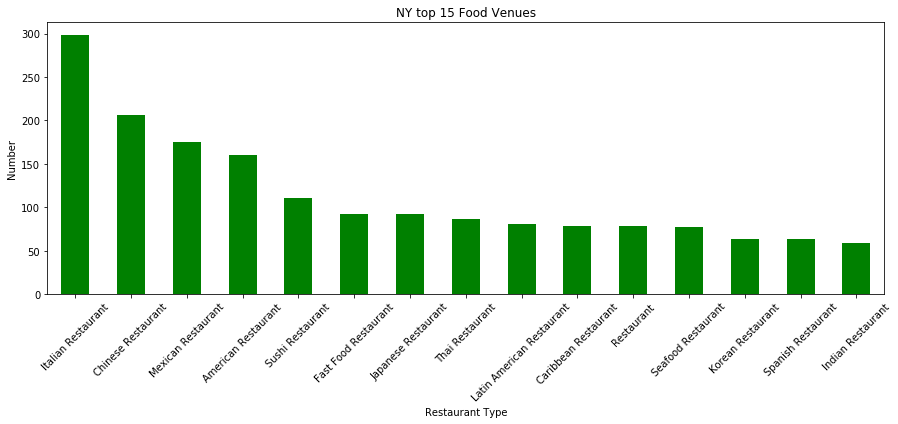

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
ny_sum15.plot(kind='bar', figsize=(15,5), color='g', legend=None)

plt.xlabel('Restaurant Type') # add to x-label to the plot
plt.xticks(rotation=45)
plt.ylabel('Number') # add y-label to the plot
plt.title('NY top 15 Food Venues')

plt.show()

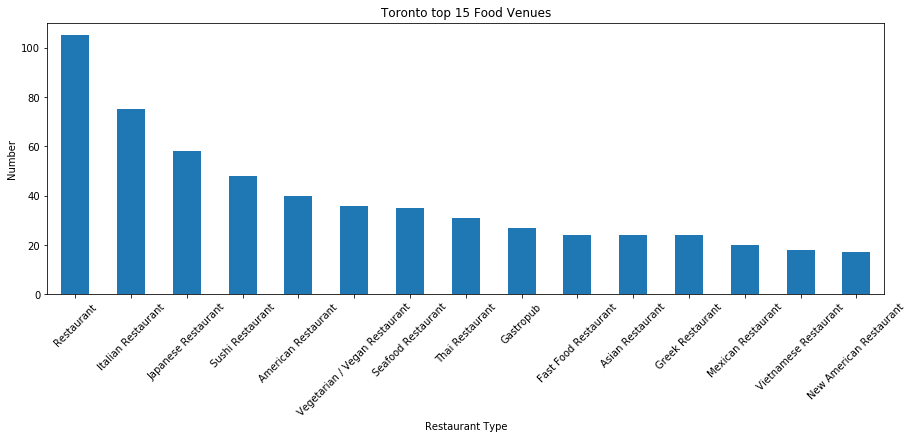

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
to_sum15.plot(kind='bar', figsize=(15,5), legend=None)

plt.xlabel('Restaurant Type') # add to x-label to the plot
plt.xticks(rotation=45)
plt.ylabel('Number') # add y-label to the plot
plt.title('Toronto top 15 Food Venues')

plt.show()

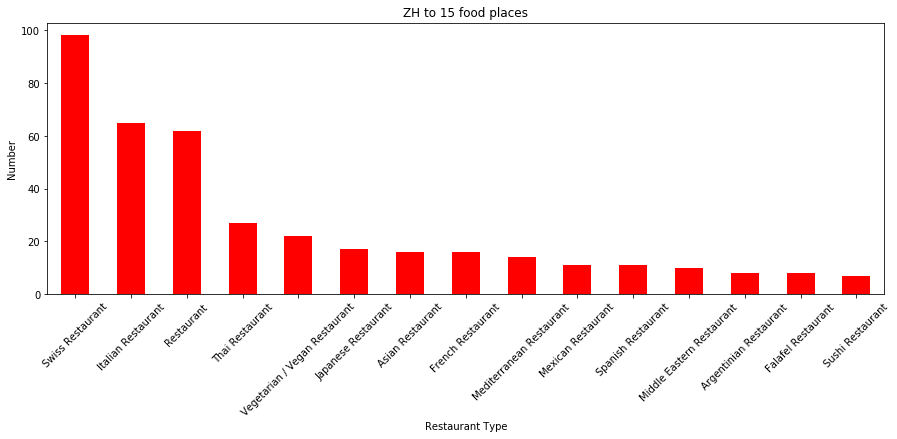

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt
zh_sum15.plot(kind='bar', figsize=(15,5), color='r',legend=None)

plt.xlabel('Restaurant Type') # add to x-label to the plot
plt.xticks(rotation=45)
plt.ylabel('Number') # add y-label to the plot
plt.title('ZH to 15 food places')

plt.show()